# Controls charts&mdash;individuals and moving range (XmR)

# In brevi

Shewhart control charts, also called process behaviour charts, are used to determine if the variation of a process is stable and predictable, that is, in a state of statistical control. In-control variation arises from chance or common causes. No changes or adjustments to the process are needed. The charts can be used to predict future performance. Out-of-control variation arises from special or assignable causes. These charts help identify the special causes in order minimize or eliminate their effect.

# Data

Download the [data file](https://drive.google.com/open?id=0BzrdQfHR2I5DRld4MndVT2R0dEk). It consists of a "Date" column and an "X" column of floats or integers. Dates are entered using [ISO 8601](https://en.wikipedia.org/wiki/ISO_8601) date format (yyyy-mm-dd).

# Methodology

The charts presented here are the individuals and moving range control charts, also called XmR or ImR. The data are collected using rational samples. The individual values (sample size is one) are plotted in time order. A central line (average) and control limits above and below the central line are plotted.


# Control chart formulae

## Individuals chart (X)

$$
    \begin{align}
        UCL_X, LCL_X & = \overline{X} \pm 3 \times \text{Sigma(X)} \\
                     & = \overline{X} \pm 3 \times \frac{\overline{R}}{d_2}
    \end{align}
$$

The constant $d_2$ can be found in tables of control chart constants. It is a rescaling constant that changes an average range to a standard deviation. The value of $d_2$ changes as the subgroup size n changes. It is common to use a moving range subgroup size 2.

## Moving range chart (mR)

$$
    \begin{align}
        UCL_R, LCL_R & = \overline{R} \pm 3 \times \text{Sigma(R)} \\
                     & = \overline{R} \pm 3 \times d_3 \times \text{Sigma(X)} \\
                     & = \overline{R} \pm 3 \times d_3 \times \frac{\overline{R}}{d_2}
    \end{align}
$$

The constant $d_3$ can be found in tables of control chart constants. It is a rescaling constant that changes a a standard deviation of individual values to a standard deviation of range values. The value of $d_3$ is a function of sugroup size.

In [1]:
# Import the required libraries and modules.
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# Read the csv data file. It is encoded in UTF-8.
# The values to plot are in column X.
# Set "date" as the index.
#chart_data = pd.read_csv('xmr.csv', parse_dates=True, index_col='Date')
chart_data = pd.read_csv('xmr.csv')

In [3]:
# Define for the X chart the graph title and subtitle, and the x and y axis labels.
x_chart_title = 'Individuals Control Chart'
x_chart_subtitle = 'Travel Cost'
x_chart_ylabel = 'Travel Cost (USD)'
x_chart_xlabel = 'Date'
subgroup_size = 2

In [4]:
# Determine d2 and d3 constants.
constants = pd.read_csv('control_chart_constants.csv')
d_two = constants['d2'][constants['n'] == subgroup_size].values[0]
d_three = constants['d3'][constants['n'] == subgroup_size].values[0]

In [5]:
# Define for the mR chart the graph title and subtitle, and the x and y axis labels.
mr_chart_title = 'Moving Range Control Chart'
mr_chart_subtitle = 'Travel Cost Difference'
mr_chart_ylabel = 'Travel Cost Moving Range (USD)'
mr_chart_xlabel = 'Date'

In [6]:
# Moving range chart statistics
# Calculate average range.
average_moving_range = (chart_data['X'].rolling(2) \
                                       .agg(lambda x: x[0] - x[1]) \
                                       .abs()) \
                                       .mean()
# Calculate Sigma(R)
sigma_r = average_moving_range * d_three / d_two
# Calculate the range chart upper control limit.
range_chart_upper_control_limit = average_moving_range + 3 * sigma_r
# Calculate the range chart lower control limit.
range_chart_lower_control_limit = average_moving_range - 3 * sigma_r
if range_chart_lower_control_limit < 0:
    range_chart_lower_control_limit = 0

In [7]:
# X chart statistics
# Calculate the average of all values.Detection
average = chart_data['X'].mean()
# Calculate Sigma(X)
sigma_x = average_moving_range / d_two
# Calculate the individual chart upper control limit.
individual_chart_upper_control_limit = average + 3 * sigma_x
# Calculate two Sigma(X) above the average
plus_two_sigma_x = average + 2 * sigma_x
# Calculate one Sigma(X) abovfe the average
plus_one_sigma_x = average + 1 * sigma_x
# Calculate the individual chart lower control limit.
individual_chart_lower_control_limit = average - 3 * sigma_x 
# Calculate two Sigma(X) below the average
minus_two_sigma_x = average - 2 * sigma_x
# Cacculate one Sigma(X) below the average
minus_one_sigma_x = average - 1 * sigma_x

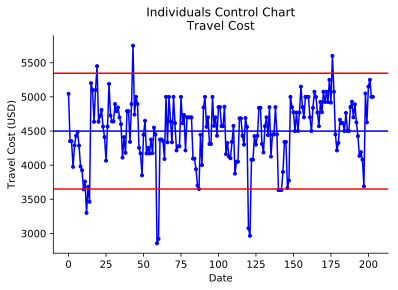

In [8]:
# Create a graph of "individual values v. date".
ax = chart_data[['X']].plot.line(legend=False, marker='o', markersize=3, color='blue')
ax.axhline(y=average, color='b')
ax.axhline(y=individual_chart_upper_control_limit, color='r')
ax.axhline(y=individual_chart_lower_control_limit, color='r')
ax.axis('auto')
# Remove the top and right spines.
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
# Add the chart title and subtitle.
ax.set_title(x_chart_title + '\n' + x_chart_subtitle)
# Add the Y axis label.
ax.set_ylabel(x_chart_ylabel)
# Add the X axis label.
ax.set_xlabel(x_chart_xlabel)
# Save the graph as svg and pdf.
ax.figure.savefig('x.svg', format='svg')
ax.figure.savefig('x.pdf', format='pdf')

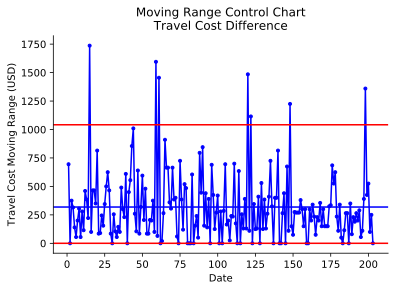

In [9]:
# Create a graph of "moving range values v. date".
ax = chart_data['X'].rolling(2) \
               .agg(lambda x: x[0] - x[1]) \
               .abs() \
               .plot.line(legend=False, marker='o', markersize=3, color='blue')
ax.axhline(y=average_moving_range, color='b')
ax.axhline(y=range_chart_upper_control_limit, color='r')
ax.axhline(y=range_chart_lower_control_limit, color='r')
ax.axis('auto')
# Remove the top and right spines.
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
# Add the chart title and subtitle.
ax.set_title(mr_chart_title + '\n' + mr_chart_subtitle)
# Add the Y axis label.
ax.set_ylabel(mr_chart_ylabel)
# Add the X axis label.
ax.set_xlabel(mr_chart_xlabel)
# Save the graph as svg and pdf.
ax.figure.savefig('mr.svg', format='svg')
ax.figure.savefig('mr.pdf', format='pdf')

# Descriptive statistics

## Individuals control chart

In [10]:
print('Sigma(X)',
      sigma_x,
      sep=' = ')
print('Upper control limit',
      individual_chart_upper_control_limit,
      sep=' = ')
print('+ 2 Sigma(X)',
      average + 2 * sigma_x,
      sep=' = ')
print('+ 1 Sigma(X)',
      average + sigma_x,
      sep=' = ')
print('Average',
      average,
      sep=' = ')
print('- 1 Sigma(X)',
      average - sigma_x,
      sep=' = ')
print('- 2 Sigma(X)',
      average - 2 * sigma_x,
      sep=' = ')
print('Lower control limit',
      individual_chart_lower_control_limit,
      sep=' = ')

Sigma(X) = 282.63546798
Upper control limit = 5346.08287453
+ 2 Sigma(X) = 5063.44740655
+ 1 Sigma(X) = 4780.81193857
Average = 4498.17647059
- 1 Sigma(X) = 4215.54100261
- 2 Sigma(X) = 3932.90553463
Lower control limit = 3650.27006665


## Moving range control chart

In [11]:
print('Sigma(R)',
      sigma_r,
      sep=' = ')
print('Upper control limit',
      range_chart_upper_control_limit,
      sep=' = ')
print('Average moving range',
      average_moving_range,
      sep=' = ')
print('Lower control limit',
      range_chart_lower_control_limit,
      sep=' = ')

Sigma(R) = 240.946736453
Upper control limit = 1041.65301724
Average moving range = 318.812807882
Lower control limit = 0


# Interpretation

## Moving range control chart
The moving range chart measures the within-subroup variation. If the process is in statistical control (all rules met), the estimation of dispersion should be useful. This chart should be evaluated first because $\overline{R}$ is used in the control limits of the individuals chart.

## Individuals control chart
The individuals control chart measures the *location* of the process. Use the Shewhart detection rules in the order as follows.

### Detection rule one
If there are no out-of-control points, proceed to the next rule. If there are out-of-control points, fix the root causes.

In [12]:
# Find points greater than the upper control limit
chart_data.loc[((chart_data['X'] > individual_chart_upper_control_limit)), :]

,X
19,5450
43,5750
176,5600


In [13]:
# Find points less than the lower control limit
chart_data.loc[((chart_data['X'] < individual_chart_lower_control_limit)), :]

,X
10,3645
12,3300
14,3463
59,2855
60,2920
87,3650
120,3075
121,2965
140,3635
141,3635


### Detection rule four

In [14]:
# Create a list with X above 2 sigma
above_two_sigma_x_list = []
for value in chart_data['X']:
    if value >= plus_two_sigma_x:
        above_two_sigma_x_list.append(1)
    else:
        above_two_sigma_x_list.append(0)
# Create a column from the list.
chart_data['above_two_sigma_x'] = above_two_sigma_x_list
# Display points where 2 of 3 consecutive X > 2 sigma.
chart_data['above_two_sigma_x_rule_4'] = chart_data['above_two_sigma_x'].rolling(3).sum()
chart_data.loc[(chart_data['above_two_sigma_x_rule_4'] == 2.0), ['X']]

,X
16,5100
17,4635
18,5100
19,5450
20,4635
172,5075
174,5250
176,5600
177,5075
178,4450


In [15]:
chart_data = chart_data.drop(['above_two_sigma_x', 'above_two_sigma_x_rule_4'], axis=1)

### Detection rule two
### Detection rule three

#  Development

- Add text for Shewhart's or Nelson's Rules; define the rules
- How do I determine T or F for each rule; loc or iloc
- Code for rule 1

# References

Wheeler, Donald J. 1995. *Advanced Topics in Statistical Process Control*. Knoxville, TN: SPC Press, Inc.